In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-faf2297f-55fe-aa06-90ed-1d90bd1223ce)


In [2]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-06-14 16:18:59--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_     [ <=>                ]   1.08M  --.-KB/s    in 0.04s   

2023-06-14 16:18:59 (24.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [1134756]



In [6]:
import pandas as pd

df = pd.read_csv("/content/sample_data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [7]:
df.head()


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [9]:
len(df)

2787

In [10]:
bitcoin_prices  = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)" : "Price"})

In [11]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


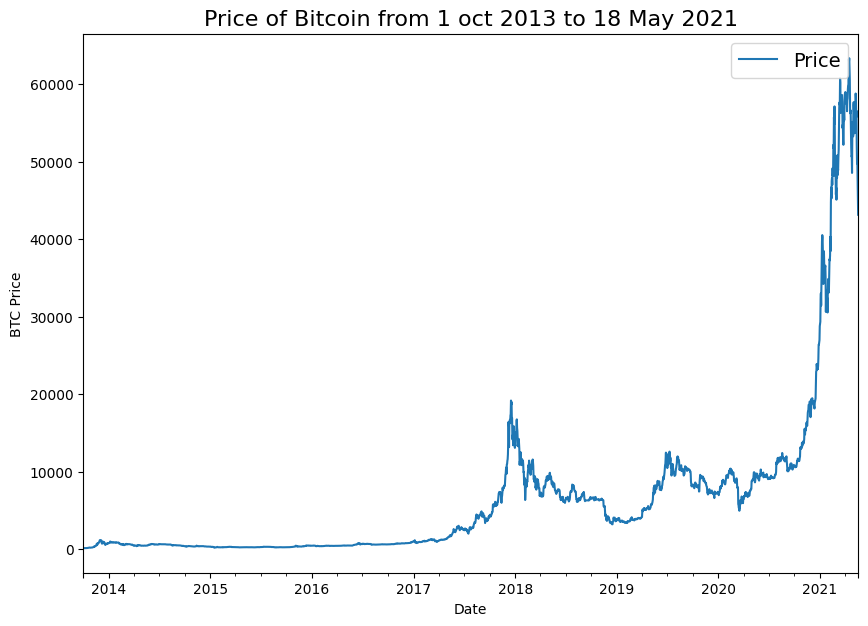

In [12]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [13]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/sample_data/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1] ,"%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

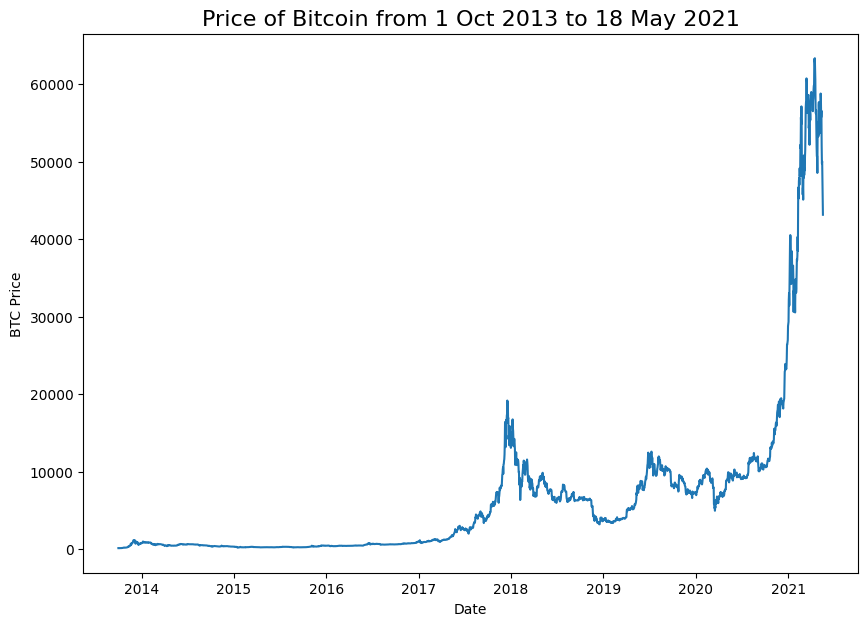

In [14]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [15]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [16]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(timesteps,
                                                       prices,
                                                       test_size=0.2,
                                                       random_state=42)

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((2229,), (558,), (2229,), (558,))

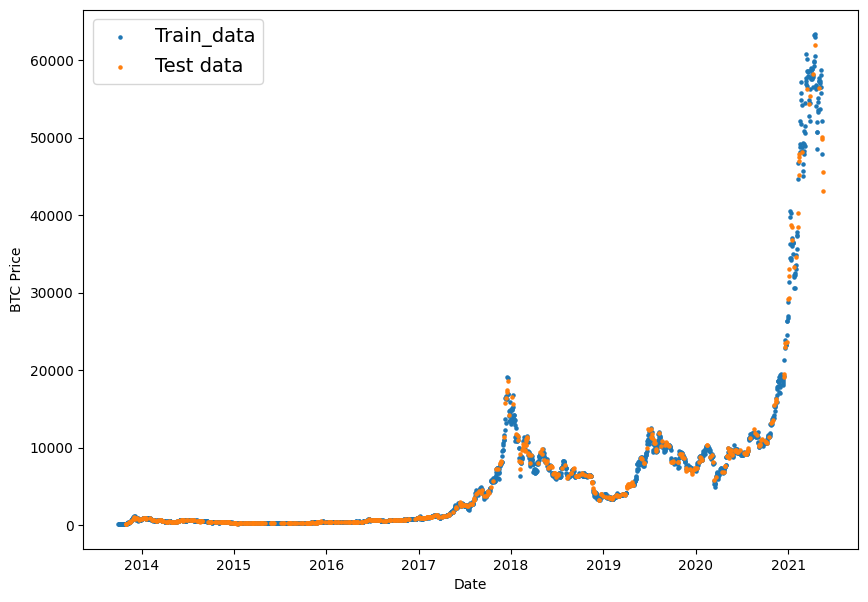

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(x_train , y_train, s=5 , label="Train_data")
plt.scatter(x_test , y_test , s=5 , label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

## creating data set fro time series

In [18]:
split_size = int(0.8 * len(prices))

x_train , y_train  =timesteps[:split_size] , prices[:split_size]

x_test , y_test = timesteps[split_size:] , prices[split_size:]

len(x_train), len(x_test) , len(y_train) , len(y_test)

(2229, 558, 2229, 558)

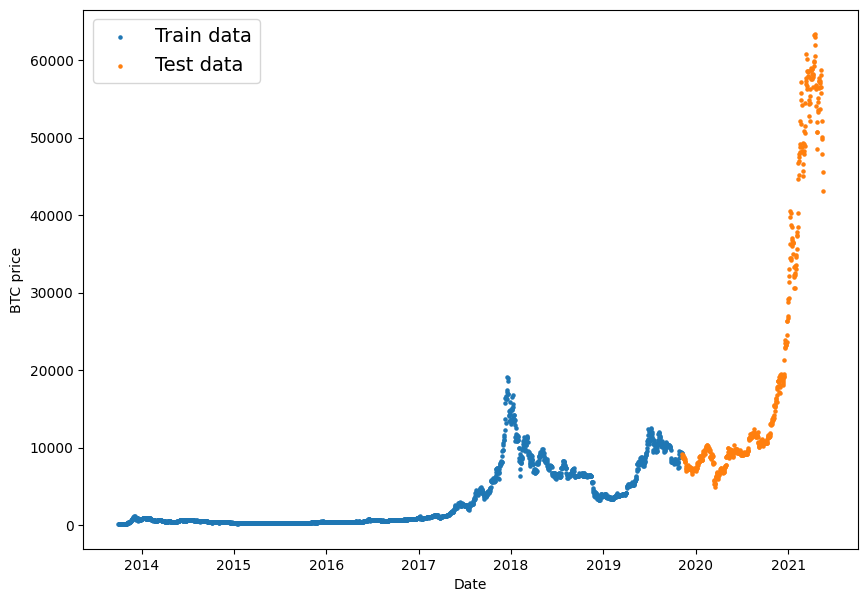

In [19]:
#plotting

plt.figure(figsize=(10,7))
plt.scatter(x_train , y_train , s=5 , label="Train data")
plt.scatter(x_test , y_test , s=5 , label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show();

In [20]:
## Creating a plotting fucntion

def plot_time_series(timesteps , values , format='.' , start=0 , end=None , label=None):
  plt.plot(timesteps[start:end], values[start:end], format , label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

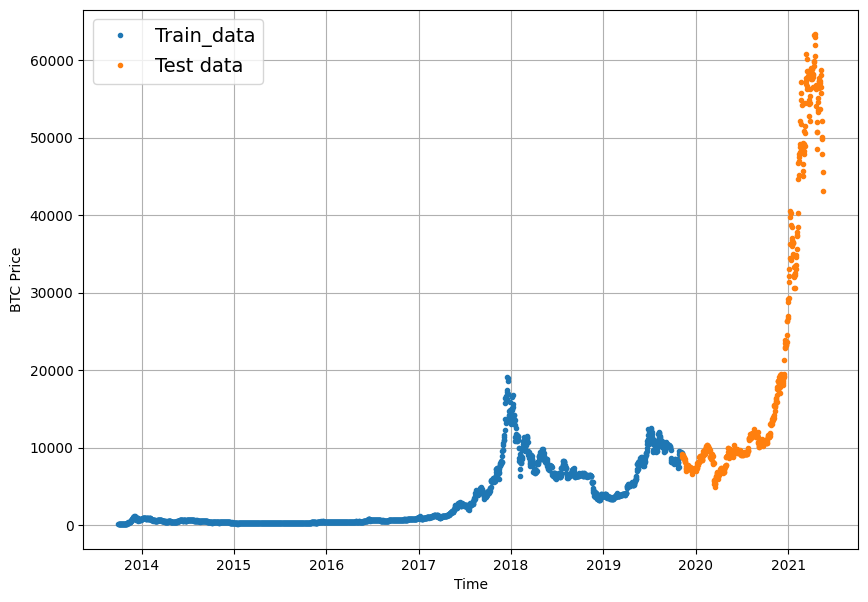

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train , values=y_train , label="Train_data")
plot_time_series(timesteps=x_test , values=y_test , label="Test data")

## Model 0 : Naive forecast (baseline)

In [22]:
naive_forecast = y_test[:-1]
naive_forecast[:10] , naive_forecast[-10:]


(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

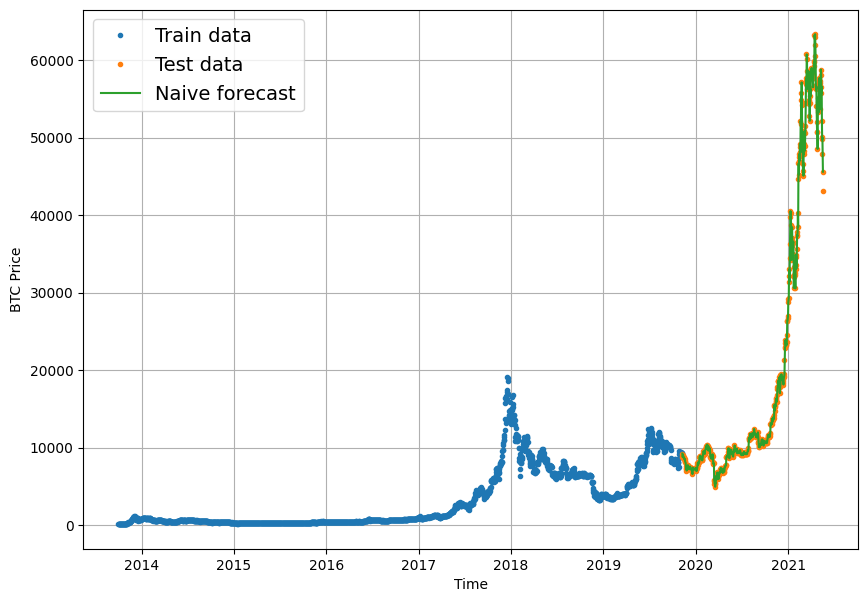

In [23]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train , values = y_train , label="Train data")
plot_time_series(timesteps=x_test , values=y_test , label ="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast , format="-" , label="Naive forecast");

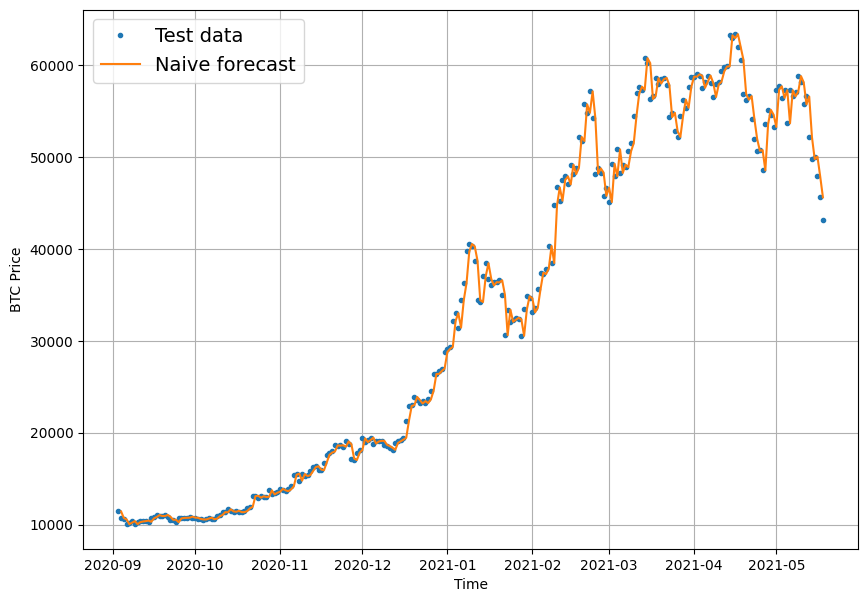

In [24]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=x_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=x_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [25]:
import tensorflow as tf

In [26]:
def mean_absolute_scaled_error(y_true , y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [27]:
def evaluate_preds(y_true , y_pred):

  y_true = tf.cast(y_true , dtype=tf.float32)
  y_pred  =tf.cast(y_pred , dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true , y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true , y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [28]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [29]:
# average price of bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

## Windowing dataset

In [30]:
horizon = 1
window_size = 7


In [31]:
def get_labelled_windows(x, horizon=1):

  return x[:, :-horizon] , x[: , -horizon:]

In [32]:
test_window , test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0), horizon=horizon)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [33]:
# Create function to view NumP arrays as windows
def make_windows(x , window_size=7 , horizon=1):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexs = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)) , axis=0).T
  windowed_array = x[window_indexs]
  windows, labels = get_labelled_windows(windowed_array , horizon=horizon)

  return windows , labels

In [34]:
full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows) , len(full_labels)

(2780, 2780)

In [35]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [36]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [37]:
### Turning windows into training and test sets

def make_train_test_splits(windows , labels , test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows , test_windows , train_labels , test_labels

In [38]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows , full_labels)
len(train_windows) , len(test_windows) ,len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [39]:
train_windows[:5] , train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [40]:
np.array_equal(np.squeeze(train_labels[:-horizon-1]), y_train[window_size:])

True

### Model checkpoint

In [41]:
# callback
import os
def create_model_checkpoint(model_name , save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path , model_name),
                                            verbose=0,
                                            save_best_only=True)

In [42]:
## Model 1: Dense model (window= 7 , horizon = 1)

import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(128),
    layers.Dense(horizon, activation="linear"),
] ,name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#fitting the model

model_1.fit(x = train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 821.8198 - mae: 821.8198    

18/18 [==============================] - 7s 58ms/step - loss: 789.8955 - mae: 789.8955 - val_loss: 1226.2288 - val_mae: 1226.2288
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 214.3037 - mae: 214.3037

18/18 [==============================] - 1s 39ms/step - loss: 214.3037 - mae: 214.3037 - val_loss: 1075.0951 - val_mae: 1075.0951
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 168.5170 - mae: 168.5170

18/18 [==============================] - 1s 39ms/step - loss: 167.3139 - mae: 167.3139 - val_loss: 1015.1083 - val_mae: 1015.1083
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 203.3455 - mae: 203.3455

18/18 [==============================] - 1s 40ms/step - loss: 203.3455 - mae: 203.3455 - val_loss: 992.5971 - val_mae: 992.5971
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 156.2761 - mae: 156.2761

18/18 [==============================] - 1s 38ms/step - loss: 155.3406 - mae: 155.3406 - val_loss: 716.1157 - val_mae: 716.1157
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 135.6952 - mae: 135.6952 - val_loss: 948.1949 - val_mae: 948.1949
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 142.5150 - mae: 142.5150

18/18 [==============================] - 1s 39ms/step - loss: 139.9593 - mae: 139.9593 - val_loss: 668.2953 - val_mae: 668.2953
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 136.3327 - mae: 136.3327

18/18 [==============================] - 1s 53ms/step - loss: 136.3519 - mae: 136.3519 - val_loss: 639.7842 - val_mae: 639.7842
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 124.9481 - mae: 124.9481 - val_loss: 783.0914 - val_mae: 783.0914
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 131.9227 - mae: 131.9227 - val_loss: 997.3608 - val_mae: 997.3608
Epoch 11/100
18/18 [==============================] - 0s 5ms/step - loss: 174.0379 - mae: 174.0379 - val_loss: 1178.2755 - val_mae: 1178.2755
Epoch 12/100
17/18 [===========================>..] - ETA: 0s - loss: 130.4434 - mae: 130.4434

18/18 [==============================] - 1s 38ms/step - loss: 131.9605 - mae: 131.9605 - val_loss: 597.3433 - val_mae: 597.3433
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6036 - mae: 111.6036 - val_loss: 748.1467 - val_mae: 748.1467
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 135.7970 - mae: 135.7970 - val_loss: 796.4556 - val_mae: 796.4556
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 132.8953 - mae: 132.8953 - val_loss: 608.2885 - val_mae: 608.2885
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 121.8753 - mae: 121.8753 - val_loss: 599.3745 - val_mae: 599.3745
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7551 - mae: 119.7551 - val_loss: 729.3950 - val_mae: 729.3950
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 156.6062 - mae: 156.6062 - val_loss: 903.6216 - val_mae: 903.6216
Epoch 19/100
18/18 [============

18/18 [==============================] - 1s 55ms/step - loss: 115.5259 - mae: 115.5259 - val_loss: 576.6646 - val_mae: 576.6646
Epoch 23/100
18/18 [==============================] - 0s 9ms/step - loss: 125.6743 - mae: 125.6743 - val_loss: 679.9547 - val_mae: 679.9547
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 115.5231 - mae: 115.5231 - val_loss: 716.3513 - val_mae: 716.3513
Epoch 25/100
18/18 [==============================] - 0s 7ms/step - loss: 129.4573 - mae: 129.4573 - val_loss: 722.5808 - val_mae: 722.5808
Epoch 26/100
18/18 [==============================] - 0s 10ms/step - loss: 134.9937 - mae: 134.9937 - val_loss: 673.7650 - val_mae: 673.7650
Epoch 27/100
18/18 [==============================] - 0s 9ms/step - loss: 119.3438 - mae: 119.3438 - val_loss: 601.6298 - val_mae: 601.6298
Epoch 28/100
18/18 [==============================] - 0s 8ms/step - loss: 116.5543 - mae: 116.5543 - val_loss: 650.0548 - val_mae: 650.0548
Epoch 29/100
18/18 [===========

18/18 [==============================] - 1s 38ms/step - loss: 120.5058 - mae: 120.5058 - val_loss: 573.0272 - val_mae: 573.0272
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 114.7072 - mae: 114.7072

18/18 [==============================] - 1s 40ms/step - loss: 115.3302 - mae: 115.3302 - val_loss: 569.9952 - val_mae: 569.9952
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 112.7354 - mae: 112.7354

18/18 [==============================] - 1s 41ms/step - loss: 111.6068 - mae: 111.6068 - val_loss: 565.8633 - val_mae: 565.8633
Epoch 34/100
18/18 [==============================] - 0s 6ms/step - loss: 109.6881 - mae: 109.6881 - val_loss: 805.8812 - val_mae: 805.8812
Epoch 35/100
18/18 [==============================] - 0s 11ms/step - loss: 120.9041 - mae: 120.9041 - val_loss: 582.8345 - val_mae: 582.8345
Epoch 36/100
18/18 [==============================] - 0s 14ms/step - loss: 113.2924 - mae: 113.2924 - val_loss: 850.0739 - val_mae: 850.0739
Epoch 37/100
18/18 [==============================] - 0s 13ms/step - loss: 140.9589 - mae: 140.9589 - val_loss: 759.9947 - val_mae: 759.9947
Epoch 38/100
18/18 [==============================] - 0s 11ms/step - loss: 125.0080 - mae: 125.0080 - val_loss: 745.9553 - val_mae: 745.9553
Epoch 39/100
18/18 [==============================] - 0s 10ms/step - loss: 118.8193 - mae: 118.8193 - val_loss: 567.4781 - val_mae: 567.4781
Epoch 40/100
12/18 [=======

18/18 [==============================] - 2s 95ms/step - loss: 113.7281 - mae: 113.7281 - val_loss: 564.9729 - val_mae: 564.9729
Epoch 41/100
10/18 [===============>..............] - ETA: 0s - loss: 112.1461 - mae: 112.1461

18/18 [==============================] - 1s 87ms/step - loss: 108.9587 - mae: 108.9587 - val_loss: 564.4183 - val_mae: 564.4183
Epoch 42/100
18/18 [==============================] - 0s 17ms/step - loss: 113.8073 - mae: 113.8073 - val_loss: 613.3815 - val_mae: 613.3815
Epoch 43/100
18/18 [==============================] - 0s 13ms/step - loss: 107.9797 - mae: 107.9797 - val_loss: 749.4957 - val_mae: 749.4957
Epoch 44/100
18/18 [==============================] - 0s 14ms/step - loss: 107.8204 - mae: 107.8204 - val_loss: 570.4771 - val_mae: 570.4771
Epoch 45/100
18/18 [==============================] - 0s 11ms/step - loss: 115.1048 - mae: 115.1048 - val_loss: 606.0086 - val_mae: 606.0086
Epoch 46/100
18/18 [==============================] - 0s 16ms/step - loss: 118.9287 - mae: 118.9287 - val_loss: 595.6463 - val_mae: 595.6463
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 112.4099 - mae: 112.4099 - val_loss: 679.5041 - val_mae: 679.5041
Epoch 48/100
18/18 [======

In [43]:
# Evaluate model on test data

model_1.evaluate(test_windows , test_labels)


18/18 [==============================] - 0s 4ms/step - loss: 588.0207 - mae: 588.0207


[588.0206909179688, 588.0206909179688]

In [44]:
# loading in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 564.4183 - mae: 564.4183


[564.4182739257812, 564.4182739257812]

In [45]:
## Making forecasts with a model (on the test dataset)

def make_preds(model , input_data):

  forecast =  model.predict(input_data)
  return tf.squeeze(forecast)

In [46]:
model_1_preds = make_preds(model_1 , test_windows)
len(model_1_preds) , model_1_preds[:10]

18/18 [==============================] - 0s 5ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8833.516, 8802.366, 9073.855, 8784.636, 8762.702, 8742.544,
        8679.565, 8550.377, 8459.608, 8551.153], dtype=float32)>)

In [47]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

model_1_results

{'mae': 564.4183,
 'mse': 1153472.8,
 'rmse': 1073.9984,
 'mape': 2.5305097,
 'mase': 0.9915266}

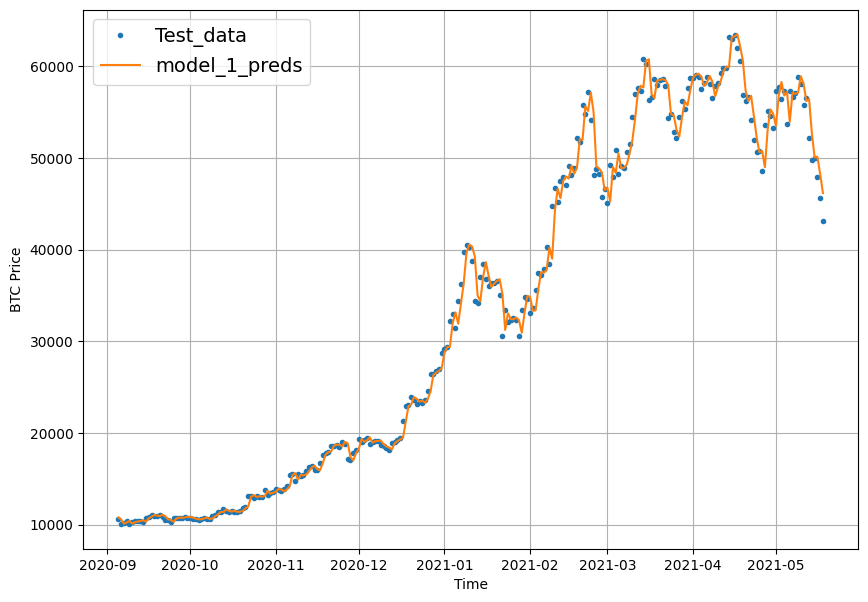

In [48]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(timesteps =  x_test[-len(test_windows):], values= test_labels[:,0], start=offset , label="Test_data")
plot_time_series(timesteps = x_test[-len(test_windows):], values= model_1_preds , start=offset , format="-" ,label="model_1_preds")


## Model 2: Dense (window = 30 , horizon = 1)

In [49]:
horizon = 1
window_size=30

In [50]:
full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows) , len(full_labels)

(2757, 2757)

In [51]:
# Make train and testing windows
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows=full_windows , labels=full_labels)
len(train_windows) , len(test_windows) , len(train_labels) ,len(test_labels)

(2205, 552, 2205, 552)

In [52]:
# Deep learning model 2

model_2 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(horizon)
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
# fit a model

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


In [53]:
model_2.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 615.8018


615.8018188476562

In [54]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows ,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 603.4630


603.4630126953125

In [55]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


In [56]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 603.463,
 'mse': 1263408.8,
 'rmse': 1124.0145,
 'mape': 2.7588198,
 'mase': 1.0548593}

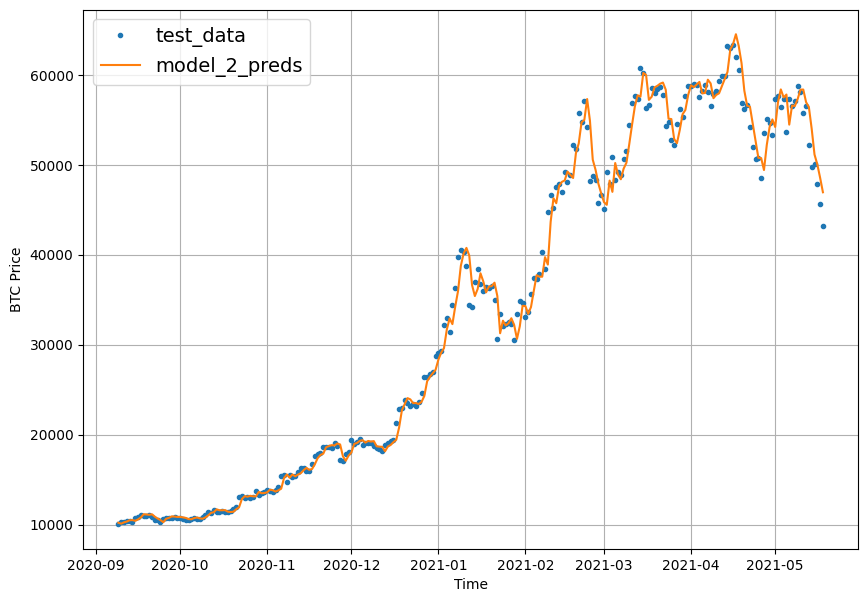

In [57]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30 , horizon=7)

In [58]:
horizon = 7
window_size = 30

In [59]:
full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows),len(full_labels)

(2751, 2751)

In [60]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(windows=full_windows , labels=full_labels , test_split=0.2 )
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [61]:
# building a model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(horizon)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [62]:
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1482.4120


1482.4119873046875

In [63]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1239.7800


1239.780029296875

In [64]:
# prediction are going to be 7 steps at a time (this is the horizon size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9336.241 , 9385.467 , 9559.517 , 9535.392 , 9716.595 , 9424.351 ,
        9414.746 ],
       [8859.213 , 9058.428 , 9153.938 , 9211.709 , 9413.827 , 9168.223 ,
        9038.162 ],
       [8806.56  , 9101.831 , 9058.085 , 9207.443 , 9007.001 , 9277.56  ,
        8862.915 ],
       [8971.743 , 9151.369 , 9188.396 , 9321.049 , 9165.653 , 9230.159 ,
        9088.724 ],
       [8842.239 , 9000.181 , 9058.45  , 9080.803 , 9031.93  , 8797.477 ,
        8959.9795]], dtype=float32)>

In [65]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'mae': array([  688.5433  ,   384.3182  ,   420.09137 ,   532.99023 ,
          412.9463  ,   588.4266  ,   590.1098  ,   612.87646 ,
          607.70264 ,   593.61096 ,   799.4458  ,   802.9923  ,
          930.5707  ,   956.1759  ,   649.6552  ,   322.1972  ,
          228.52644 ,   244.78377 ,   174.51646 ,   204.49756 ,
          145.00838 ,   234.96498 ,   414.2161  ,   372.8017  ,
          242.33113 ,   160.23424 ,   111.93004 ,    83.09382 ,
          146.18506 ,   203.90031 ,   251.50732 ,   393.79666 ,
          349.55865 ,   334.9903  ,   300.1403  ,   286.25836 ,
          354.57227 ,   244.83601 ,   241.5201  ,   164.53732 ,
          424.8272  ,    73.36796 ,    83.41267 ,   114.79276 ,
          157.14767 ,   135.53983 ,   119.40074 ,   117.09843 ,
           83.82945 ,   114.482704,   137.71834 ,   171.55867 ,
          207.40025 ,   214.65388 ,   265.32574 ,   301.96066 ,
          539.5361  ,   416.93317 ,   540.92883 ,   521.85944 ,
          277.78418 ,   209.44225

In [66]:
### evaluation function work for larger horizons

def evaluate_preds(y_true , y_pred):

  y_true = tf.cast(y_true , dtype=tf.float32)
  y_pred = tf.cast(y_pred , dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true ,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true , y_pred)
  rmse = tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true , y_pred)
  mase = mean_absolute_scaled_error(y_true , y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [67]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1239.78,
 'mse': 5392528.0,
 'rmse': 1425.5421,
 'mape': 5.6177173,
 'mase': 2.2061193}

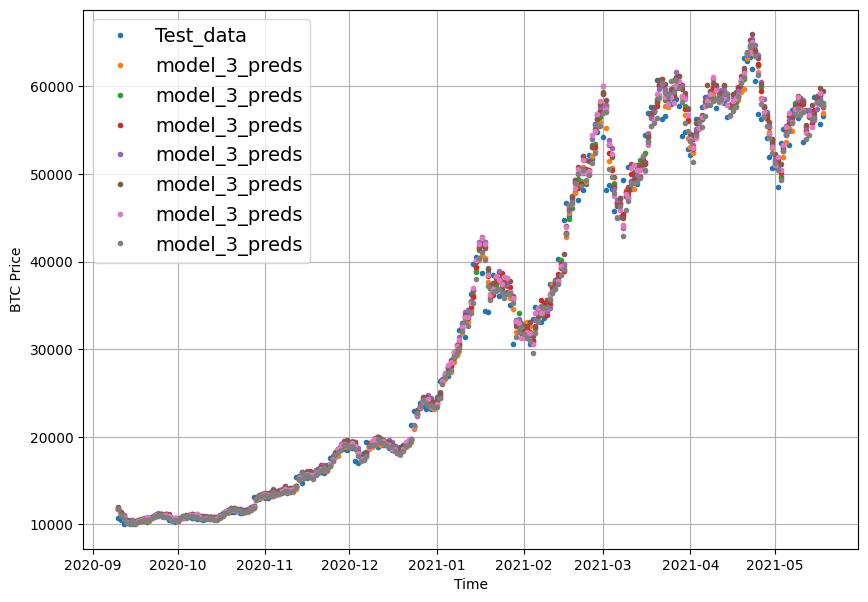

In [68]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(timesteps=x_test[-len(test_windows):] , values=test_labels[: , 0], start=offset ,label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):] , values=model_3_preds , start=offset ,label ="model_3_preds")

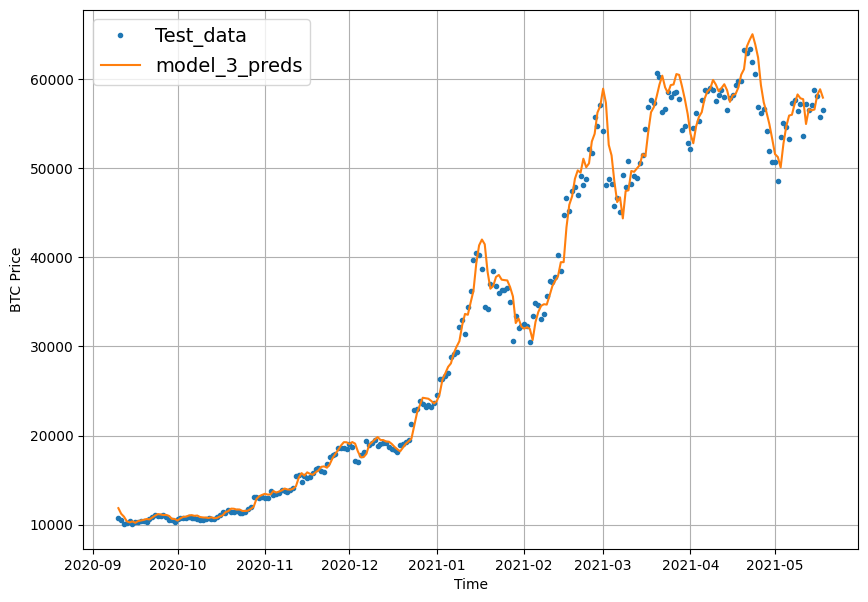

In [69]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=x_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

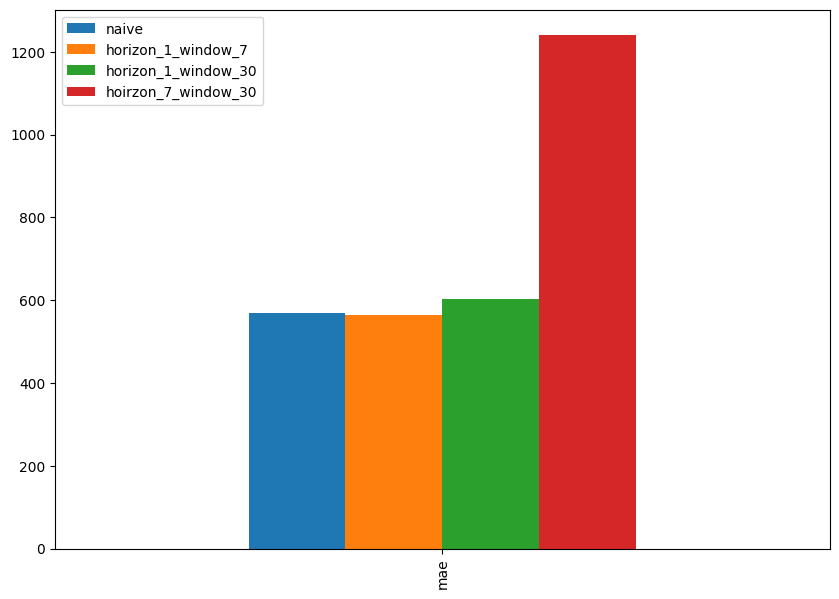

In [70]:
### comparing other all model till now

pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "hoirzon_7_window_30": model_3_results["mae"]},index=["mae"]).plot(figsize=(10,7), kind="bar");

#### here we can see that naive and model 1 performing approx same

## Model 4: Conv1D

In [71]:
horizon = 1
window_size = 7

full_windows , full_labels = make_windows(prices , window_size=window_size , horizon=horizon)
len(full_windows) , len(full_labels)

(2780, 2780)

In [72]:
train_windows , test_windows , train_labels , test_labels = make_train_test_splits(full_windows , full_labels)
len(train_windows) , len(test_windows) ,len(train_labels) ,len(test_labels)

(2224, 556, 2224, 556)

In [73]:
# check data sample shapes

train_windows[0].shape

(7,)

In [74]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f"Original shape: {x.shape}")
print(f"Expand shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded  shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expand shape: (7, 1)
Original values with expanded  shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [75]:
# building a model

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128 , kernel_size=5 , padding="causal" , activation="relu"),
    layers.Dense(horizon)
] , name="model_4_conv1D")

# compile

model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [76]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 10ms/step - loss: 577.1970


577.197021484375

In [77]:
model_4_preds = make_preds(model_4 , test_windows)
model_4_preds[:10]


18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8877.189, 8769.885, 8958.138, 8740.376, 8734.105, 8717.539,
       8659.099, 8504.061, 8449.183, 8488.443], dtype=float32)>

In [78]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 577.1971,
 'mse': 1193462.6,
 'rmse': 1092.4572,
 'mape': 2.5909002,
 'mase': 1.0139754}

## Model 5 :RNN (LSTM)

In [79]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(window_size))
x= layers.Lambda(lambda x: tf.expand_dims(x , axis=1))(inputs)
x = layers.LSTM(128 , activation="relu")(x)

output = layers.Dense(horizon)(x)
model_5 = tf.keras.Model(inputs=inputs , outputs=output , name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows , test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])



In [80]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows , test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 586.5357


586.5357055664062

In [81]:
model_5_preds = make_preds(model_5 ,test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8932.518, 8820.09 , 8966.45 , 8770.179, 8771.57 , 8751.738,
       8666.645, 8564.996, 8472.685, 8510.193], dtype=float32)>

In [82]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 586.53577,
 'mse': 1231252.4,
 'rmse': 1109.618,
 'mape': 2.6290174,
 'mase': 1.0303808}

In [83]:
## Making a mutlivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [84]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")


In [85]:
# Get date indexes fro when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days



(1012, 2414)

In [86]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


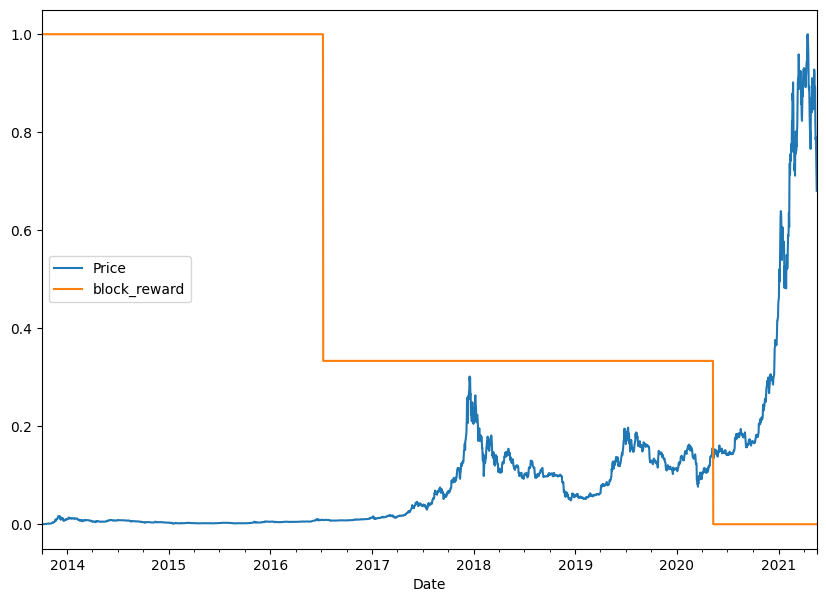

In [89]:
## Plot the block reward/price over time

from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [90]:
## Making a windowed dataset with pandas
horizon = 1
window_size = 7

In [91]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add winodw in columns
for i in range(window_size):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [92]:
x = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
x.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [93]:
split_size = int(len(x) *0.8)
x_train , y_train = x[:split_size] ,y[:split_size]
x_test , y_test = x[split_size:] , y[split_size:]
len(x_train) , len(y_train) ,len(x_test), len(y_test)

(2224, 2224, 556, 556)

In [94]:
## Model 6: Dense (Multivariate time series)
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128 , activation="relu"),
    layers.Dense(horizon)
], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(x_train , y_train,
            epochs=100,
            verbose=0,
            validation_data =(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [95]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(x_test , y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.7560


564.7560424804688

In [96]:
model_6_preds = tf.squeeze(model_6.predict(x_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8831.778, 8764.688, 9044.841, 8760.145, 8711.571, 8735.511,
       8680.683, 8501.221, 8448.523, 8528.165], dtype=float32)>

In [97]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 564.75604,
 'mse': 1153930.5,
 'rmse': 1074.2115,
 'mape': 2.5222938,
 'mase': 0.99211997}

In [98]:
model_1_results

{'mae': 564.4183,
 'mse': 1153472.8,
 'rmse': 1073.9984,
 'mape': 2.5305097,
 'mase': 0.9915266}

## Model 7: N-BEATS algorithm

In [99]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [100]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=window_size,
                                       theta_size=window_size+horizon,
                                       horizon=horizon,
                                       n_neurons=128,
                                       n_layers=4)

In [101]:
dummy_inputs = tf.expand_dims(tf.range(window_size) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [102]:
backcast , forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.11615877  1.0257119   0.30091554  0.11143919  1.3910512  -0.7967534
 -0.25224888]
forecast: 1.087911605834961


### Preparing data for the N-BEATS alogorithm using tf.data

In [103]:
horizon = 1
window_size = 7

In [104]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [110]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(window_size):
  bitcoin_prices_nbeats[f"Price+ {i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+ 1,Price+ 2,Price+ 3,Price+ 4,Price+ 5,Price+ 6,Price+ 7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [106]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [107]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# combine features anbd labels
train_dataset = tf.data.Dataset.zip((train_features_dataset , train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset , test_labels_dataset))

# 3. Batch and prefetch for optimal  performance

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset , test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 8), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [108]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = window_size * horizon
THETA_SIZE = INPUT_SIZE + horizon

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

In [109]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1,tensor_2])

added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Substracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Substracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [120]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=horizon,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=horizon,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

ValueError: ignored